# 4.1.9 Practical Activity

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime

# Imporve the DPI of the charts
plt.rcParams['figure.dpi'] = 144
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={"figure.dpi":144, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
sns.color_palette("Set2")
sns.despine()

# Read the CSV file.
mov = pd.read_csv('movies.csv')

# View the DataFrame.
print(mov.shape)
print(mov.columns)
print(mov.dtypes)
mov.head()

(16744, 11)
Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


<Figure size 864x576 with 0 Axes>

In [2]:
# Read the CSV file.
ott = pd.read_excel('ott.xlsx')

# View the DataFrame.
print(ott.shape)
print(ott.columns)
print(ott.dtypes)
ott.head()

(16744, 5)
Index(['ID', 'Netflix', 'Hulu', 'Prime Video', 'Disney+'], dtype='object')
ID             int64
Netflix        int64
Hulu           int64
Prime Video    int64
Disney+        int64
dtype: object


,ID,Netflix,Hulu,Prime Video,Disney+
0,1,0,0,1,0
1,2,0,1,0,0
2,3,0,0,1,0
3,4,1,0,0,0
4,5,0,0,1,0


In [3]:
mov_ott_merged = mov.merge(ott, how='left', on='ID')
print(mov_ott_merged.shape)
print(mov_ott_merged.columns)
print(mov_ott_merged.dtypes)
mov_ott_merged.head()

(16744, 15)
Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+'],
      dtype='object')
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
dtype: object


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,1,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0


<AxesSubplot:xlabel='Age', ylabel='count'>

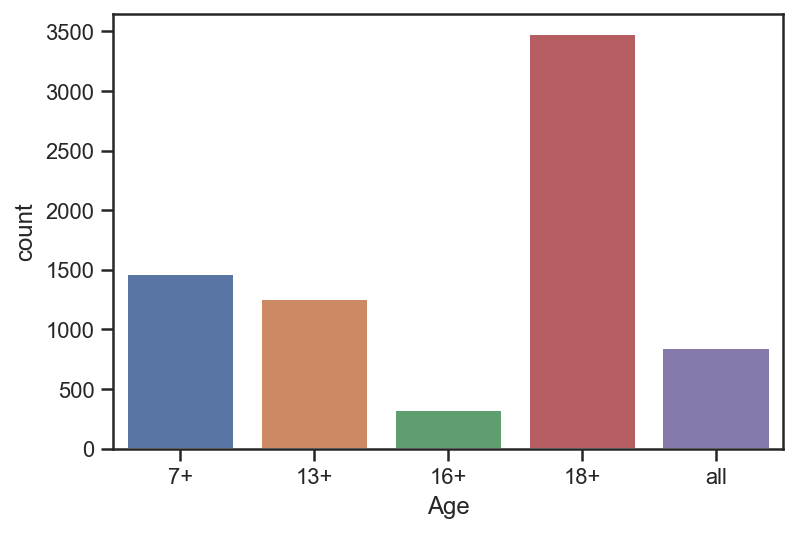

In [4]:
# Create a countplot with Seaborn.
sns.countplot(x='Age', order=['7+', '13+', '16+', '18+', 'all'], data=mov_ott_merged)

The 18+ age group had the most streamed movies. I would look into the data distionary or ask to identify the all category as it doesn't appear to be an addition of the other categories.

   ID  Age  Netflix  Hulu  Prime Video  Disney+
0   1  13+        0     0            1        0
1   2  18+        0     1            0        0
2   3  13+        0     0            1        0
3   4   7+        1     0            0        0
4   5  18+        0     0            1        0
   ID  Age streaming_platform  watched
0   1  13+            Netflix        0
1   2  18+            Netflix        0
2   3  13+            Netflix        0
3   4   7+            Netflix        1
4   5  18+            Netflix        0


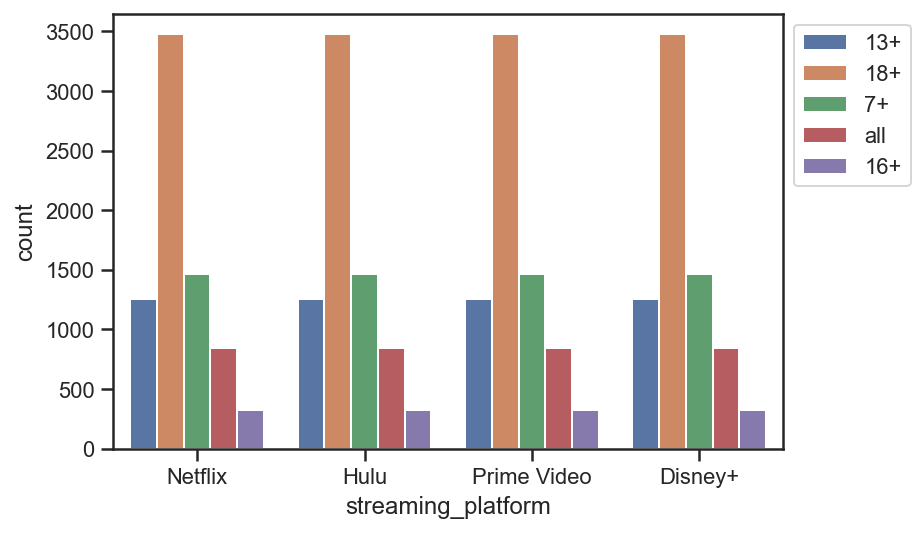

In [5]:
# Create a DataFrame with specified columns. 
streaming = mov_ott_merged[['ID', 'Age', 'Netflix', 
                   'Hulu', 'Prime Video', 
                   'Disney+']]
# View the DataFrame.
print(streaming.head()) 

# Reshape the DataFrame from wide to long.  
streaming_long = streaming.melt(id_vars=['ID', 'Age'],  
                              var_name='streaming_platform', value_name='watched')
# View the DataFrame. 
print(streaming_long.head())

# my_order = streaming_long.groupby(by=['Netflix'])['streaming_platform'].sum().index

sns.countplot(x='streaming_platform', hue= 'Age', data=streaming_long)

# Adjust legend position
plt.legend(bbox_to_anchor=(1, 1))

Most of the viewers fall into the 18+ category.

<AxesSubplot:xlabel='Age', ylabel='count'>

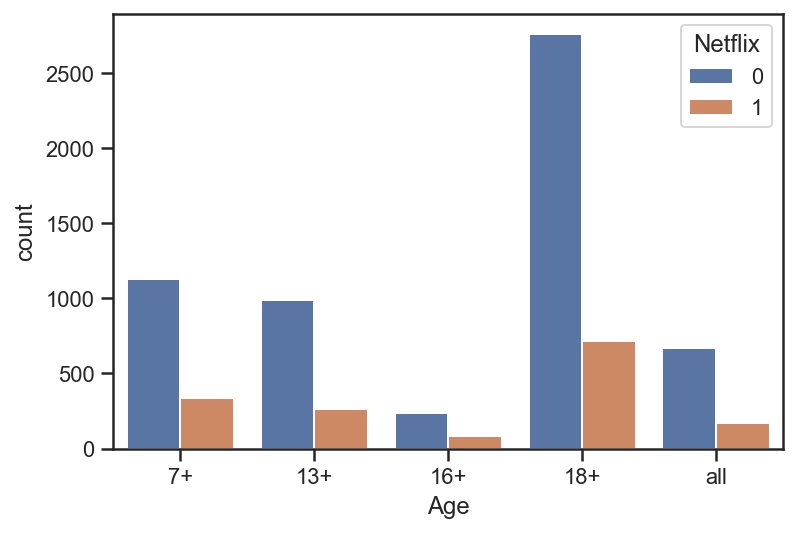

In [6]:
sns.countplot(x='Age', hue='Netflix', order=['7+', '13+', '16+', '18+', 'all'], data=mov_ott_merged)

Netflix, Hulu, Prime Video, and Disney+ need to invest more in 16+ as this is the category with the lowest viewers.

<AxesSubplot:xlabel='IMDb', ylabel='Count'>

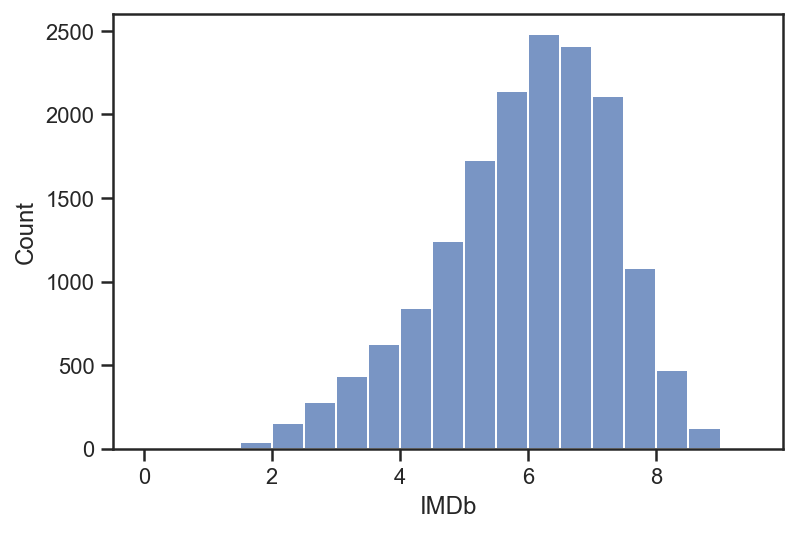

In [7]:
# Plot a histogram for the IMDb rating column, I also adjusted the bins size

sns.histplot(x='IMDb', data=mov_ott_merged, binwidth=0.5)

The histogram is skewed to the left and tells us that most of the movies have an IMDb rating that rangest between 6 to 6.5. It would be interesting to explore the spread of the data further with a boxplot.

<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='IMDb'>

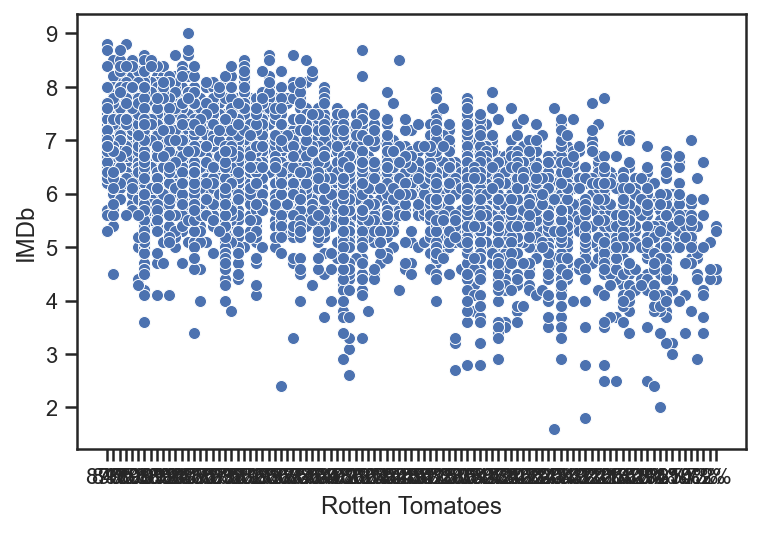

In [8]:
sns.scatterplot(x='Rotten Tomatoes', y='IMDb', data=mov_ott_merged)

Is there a correlation between the ratings from Rotten Tomatoes and IMDb?

There is a high negative correlation between the ratings 

# 4.1.12 Practical Activity

Plot a boxplot to display the outliers when comparing the user age and their IMDb ratings for the movies. Based on the plot, answer the following questions: 
What can you infer from the outliers of the ratings data given by different age groups?
How can you improve the quality of the figure?

<AxesSubplot:xlabel='Age', ylabel='IMDb'>

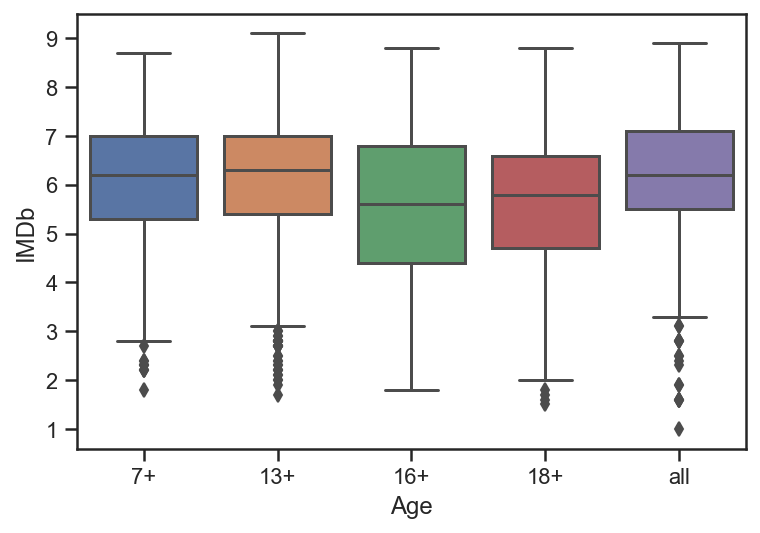

In [10]:
# Create a boxplot based on species and body_mass_g.
sns.boxplot(data=mov_ott_merged, x='Age', y='IMDb', order=['7+', '13+', '16+', '18+', 'all'])

We notice that the only age group that doesn't display outliers is the 16+ group, also because we know that we have the least of users in this category.
The central line in every box represents the median of the respective category and again it shows lower levels for the 16+ and 18+ groups. This could indicate to the streaming platform to invest resources to attract customers even from these 2 categories.
We notice that the maximum values are almost equivalent but we have very different minumum values across the categories, where all outliers are placed.
We also notice that the spread of IMDb ratings for 16+ is much wider than the othersand that there are analogies with the 18+ group, probably because of the similarity of the users' age.
We can infer that 7+, 13+, and "All" categories display more outliers and therefore these groups rarely watch movies with a IMDb rating lower than 3.5.
I have improved the quality of the graph by ordering the age groups.

# 4.1.15 Practical Activity

Plot a lineplot to identify possible trends by comparing the movies' release year and their IMDb ratings. Based on the plot, answer the following questions:
What can you infer about the users’ ratings for movies released between 1920 and 1940?
What can you infer about the users’ ratings for movies released between 1960 and 1980?

In [11]:
# See columns

mov_ott_merged.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+'],
      dtype='object')

Text(0.5, 1.0, 'Lineplot for movies')

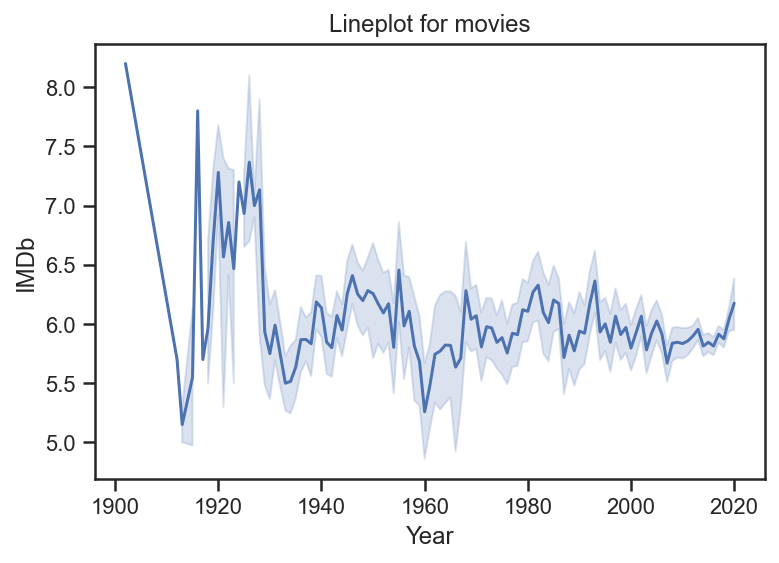

In [12]:
# Draw lineplot and set title

sns.lineplot(x='Year', y='IMDb',
            data=mov_ott_merged).set_title("Lineplot for movies")

The shadow on the backgroud represents the confidence interval.

Text(0.5, 1.0, 'Lineplot for movies ratings over time')

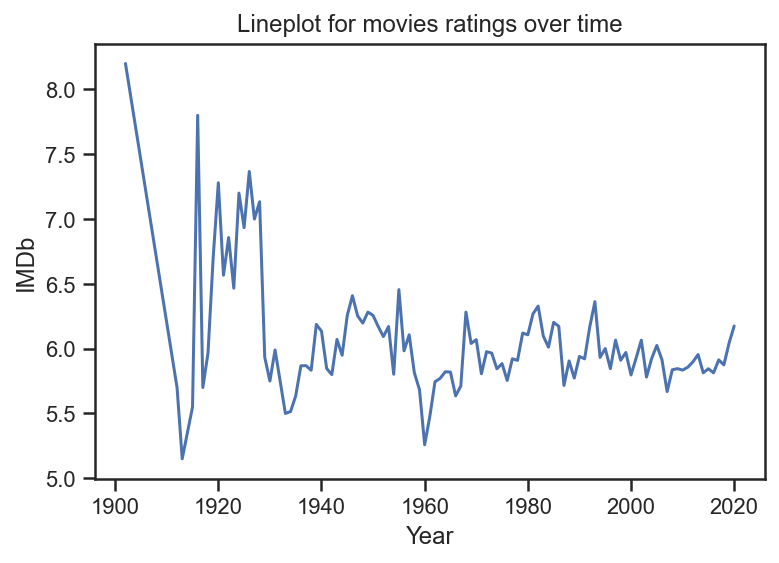

In [36]:
# Draw lineplot and set title without confidence interval.

sns.lineplot(x='Year', y='IMDb',
            data=mov_ott_merged, ci=None).set_title("Lineplot for movies ratings over time")

We can infere that the rating for the movies released between 1920-1940 are much higher than 1960-1980 and we can see a general trend for movies vith a very high rating up to about 1930 then the trend stabilizes. This happens because probably the movies released up to 1930 were pioneering pieces of cinematography.

Text(0.5, 1.0, 'Lineplot for movies ratings over time')

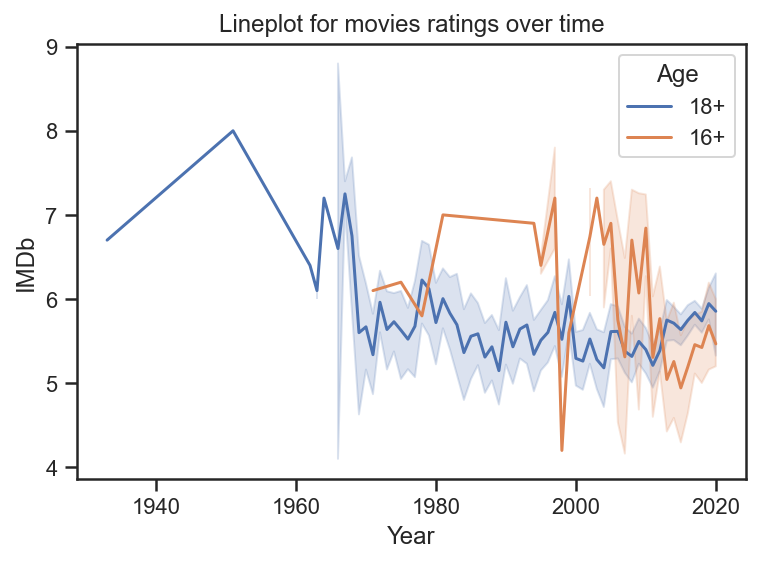

In [38]:
# Create lineplots with specification.
sns.lineplot(x = 'Year', y = 'IMDb',
             data=mov_ott_merged[mov_ott_merged['Age'].isin(['16+', '18+'])],
             hue ='Age').set_title("Lineplot for movies ratings over time")

Text(0.5, 1.0, 'Lineplot for movies ratings over time')

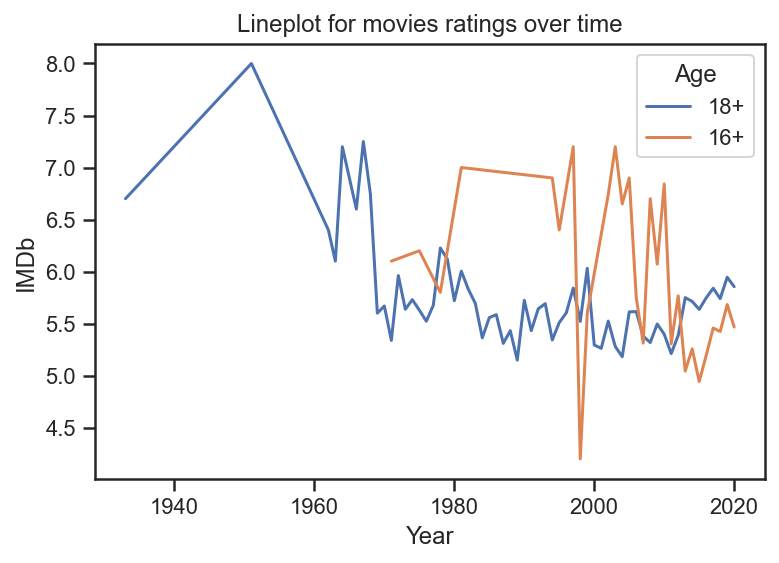

In [39]:
# Remove confidence interval

sns.lineplot(x = 'Year', y = 'IMDb',
             data=mov_ott_merged[mov_ott_merged['Age'].isin(['16+', '18+'])],
             hue ='Age', ci=None).set_title("Lineplot for movies ratings over time")

We notice a crash for 16+ just before year 2000 and for age 18+ very high ratings  until the seventies and then the trend stabilises.

# 4.2.5 Practical Activity

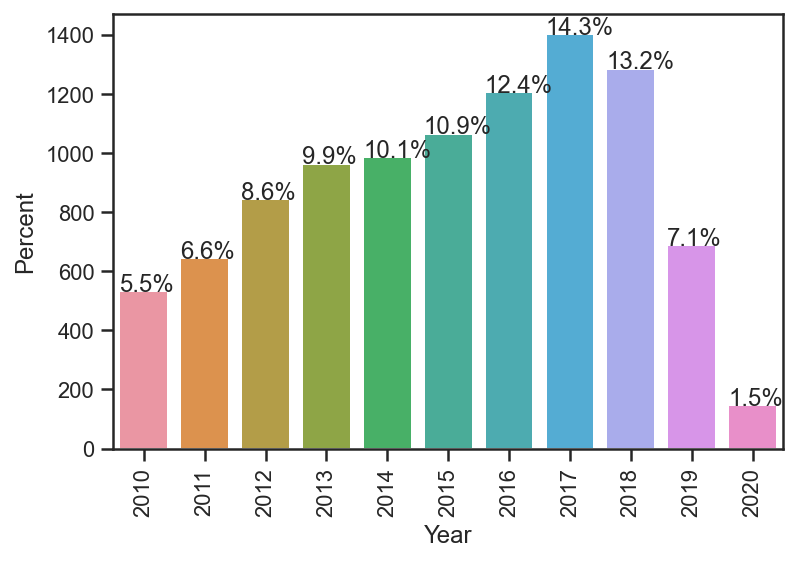

In [40]:
mov_ott_2010 = mov_ott_merged[mov_ott_merged['Year']>=2010]

ax = sns.countplot(x='Year', data=mov_ott_2010)

ax.set(ylabel='Percent')

total = len(mov_ott_2010['Year'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

plt.xticks(rotation=90)
plt.show()

From the previous barplot we see the display of the percentages of movies viewed from 2010 to 2020. We note a constant increasing trend up to 2017 and then an abrupt reduction probably due to the pandemic.

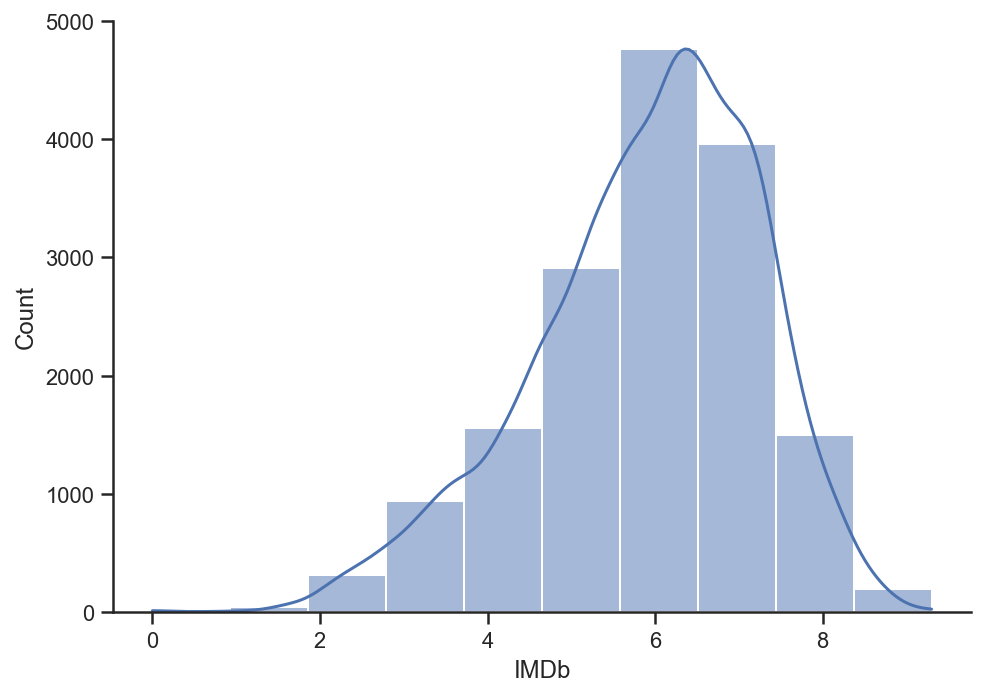

In [44]:
# Plot a histogram with KDE

ax = sns.displot(data=mov_ott_merged, x='IMDb', bins=10,kind='hist', 
                 palette='GnBu', aspect=1.4, kde=True)

plt.show()

The above is a layered KDE (kernel density estimate) which can improve prediction accuracy and help with bandwidth optimisation. Basically, as well as the distribution of data in our DataFrame it also shows the density.
It is placed on top of the histogram I created earlier with the following code snippet:
sns.scatterplot(x='Rotten Tomatoes', y='IMDb', data=mov_ott_merged)

# 4.2.7 Practical Activity

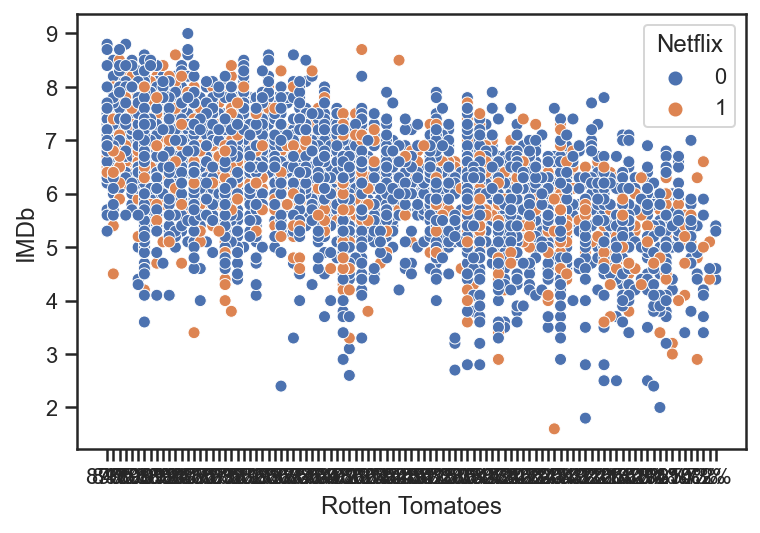

In [47]:
sns.scatterplot(data=mov_ott_merged, x='Rotten Tomatoes', y='IMDb', hue='Netflix')

plt.show()

The scatterplot above shows the relationship between the IMDb and Rotten Tomatoes ratings. The hue highlights those movies that are available on Netflix. It adds information to the scatterplot I created earlier with the following code snippet: sns.scatterplot(x='Rotten Tomatoes', y='IMDb', data=mov_ott_merged)t_merged)

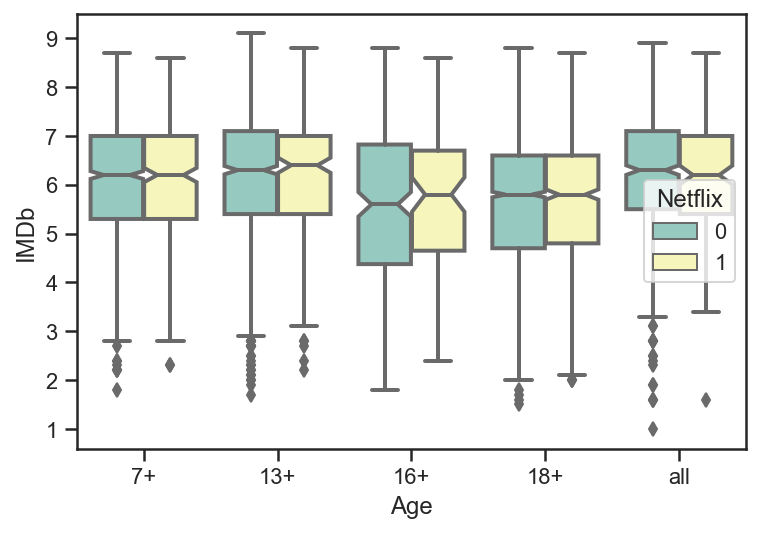

In [49]:
sns.boxplot(data=mov_ott_merged, x='Age', y='IMDb', order=['7+', '13+', '16+', '18+', 'all'], linewidth=2, 
            notch=True, hue='Netflix', palette='Set3')

plt.show()

The above boxplot shows statistical information (minumim and maximum values, outliers, spread of the data or IQR, median, lower quartile and upper quartile) about IMDb ratings for the different age groups. This time I added a hue to ighlight the statistical information of the movies on Netflix compared to the other streaming platforms. It adds information to the boxplot I created earlier with the following code snippet:
sns.boxplot(data=mov_ott_merged, x='Age', y='IMDb', order=['7+', '13+', '16+', '18+', 'all']).
We notice that the spread of the data for 16+ is significantly wider, while for 7+ coincides.

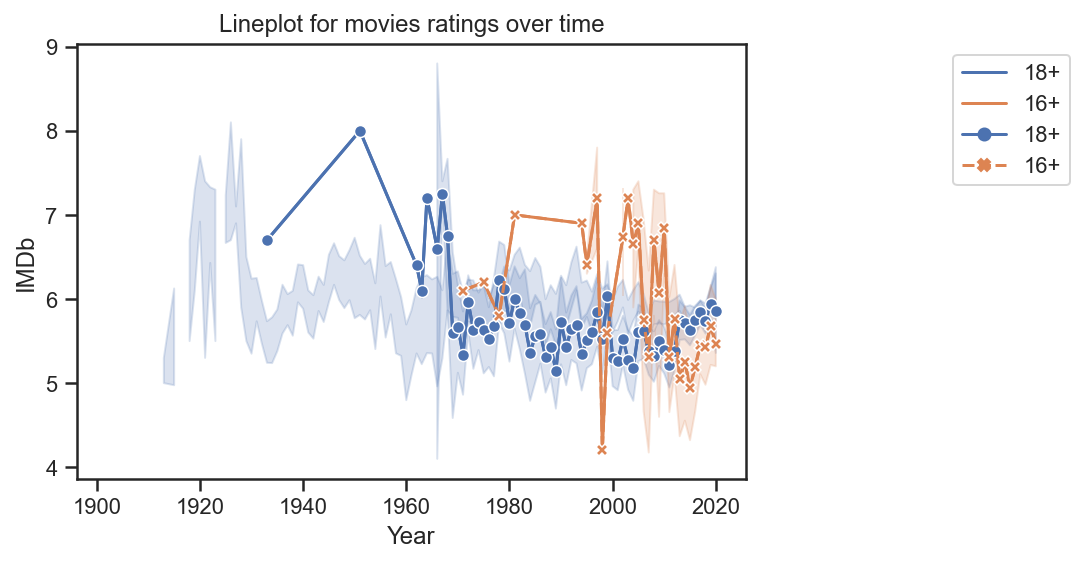

In [74]:
sns.lineplot(x = 'Year', y = 'IMDb', data=mov_ott_merged, linewidth=0)

sns.lineplot(x = 'Year', y = 'IMDb', 
             data=mov_ott_merged[mov_ott_merged['Age'].isin(['16+', '18+'])],\
             hue ='Age')

sns.lineplot(x = 'Year', y = 'IMDb', 
             data=mov_ott_merged[mov_ott_merged['Age'].isin(['16+', '18+'])],\
             hue ='Age', style = 'Age', markers=True, ci=0).set_title("Lineplot for movies ratings over time")

plt.legend(bbox_to_anchor=(1.5, 1))

This is similar to the above trendline with added annotations for  16+ and 18+ points. 
I also adjusted the legend.
I previously created a similar lineplot using the following code snippet:
sns.lineplot(x = 'Year', y = 'IMDb',
             data=mov_ott_merged[mov_ott_merged['Age'].isin(['16+', '18+'])],
             hue ='Age', ci=None).set_title("Lineplot for movies ratings over time")